# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


In [55]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy import stats

# Cargar tu dataset 
datos = pd.read_csv("/datasets/logs_exp_us.csv", sep='\t')

# Renombrar las columnas
datos = datos.rename(columns={
    'EventName': 'evento',
    'DeviceIDHash': 'idusuario',
    'EventTimestamp': 'tiempo',
    'ExpId': 'experimento'
})

# Mostrar las nuevas columnas
print("\nColumnas renombradas:")
print(datos.columns)

print(datos.info())


Columnas renombradas:
Index(['evento', 'idusuario', 'tiempo', 'experimento'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   evento       244126 non-null  object
 1   idusuario    244126 non-null  int64 
 2   tiempo       244126 non-null  int64 
 3   experimento  244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


In [56]:
print(datos.sample(10))

                         evento            idusuario      tiempo  experimento
97173   PaymentScreenSuccessful  6519468181324065430  1564844984          247
170130         CartScreenAppear  7526046938368750001  1565025782          246
122158         MainScreenAppear  4267532622889785380  1564919536          246
171739  PaymentScreenSuccessful  2305766456715991733  1565028315          248
192726         MainScreenAppear  7421562291363261516  1565092812          247
227248         MainScreenAppear  5826995275980743152  1565180651          247
19787        OffersScreenAppear  4448696399787217195  1564663551          246
123518       OffersScreenAppear   166254878560341468  1564921686          246
221854         CartScreenAppear  5068740433396889799  1565170115          246
202848         MainScreenAppear   214508220474797491  1565107951          248


In [57]:
# Convertir la hora (timestamp) a formato datetime
datos['tiempo'] = pd.to_datetime(datos['tiempo'], unit='s')

# Crear una nueva columna con solo la fecha
datos['fecha'] = datos['tiempo'].dt.date

# Mostrar los primeros registros para confirmar
print(datos.head(10))

                    evento            idusuario              tiempo  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   
5         CartScreenAppear  6217807653094995999 2019-07-25 11:48:43   
6       OffersScreenAppear  8351860793733343758 2019-07-25 14:50:42   
7         MainScreenAppear  5682100281902512875 2019-07-25 20:14:37   
8         MainScreenAppear  1850981295691852772 2019-07-25 20:31:42   
9         MainScreenAppear  5407636962369102641 2019-07-26 03:35:12   

   experimento       fecha  
0          246  2019-07-25  
1          246  2019-07-25  
2          248  2019-07-25  
3          248  2019-07-25  
4          248  2019-07-25  
5          248  2019-07-25  
6          246 

In [58]:
datos['hora'] = datos['tiempo'].dt.hour
datos.sample(10)

,evento,idusuario,tiempo,experimento,fecha,hora
176153,MainScreenAppear,4097782667445790512,2019-08-05 21:15:14,246,2019-08-05,21
95225,MainScreenAppear,1113177574547813281,2019-08-03 14:24:47,247,2019-08-03,14
147151,PaymentScreenSuccessful,5196591450298872317,2019-08-05 07:50:15,248,2019-08-05,7
205949,PaymentScreenSuccessful,6306684652806916729,2019-08-06 17:27:38,248,2019-08-06,17
208644,CartScreenAppear,489834326588358430,2019-08-06 18:34:12,246,2019-08-06,18
238731,MainScreenAppear,89078601045475920,2019-08-07 17:21:00,248,2019-08-07,17
206110,MainScreenAppear,2634996631528805404,2019-08-06 17:31:08,246,2019-08-06,17
54013,MainScreenAppear,2158571047687661482,2019-08-02 11:25:37,247,2019-08-02,11
68762,CartScreenAppear,4245537020379281480,2019-08-02 18:01:01,246,2019-08-02,18
64585,MainScreenAppear,2601680786771671473,2019-08-02 16:00:27,247,2019-08-02,16


In [59]:
# Visualizar eventos 
datos ['evento'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: evento, dtype: int64

In [60]:
# Visualizar usuarios
len(datos['idusuario'].unique())

7551

In [61]:
# Visualizar experimentos
datos['experimento'].value_counts()

248    85747
246    80304
247    78075
Name: experimento, dtype: int64

In [62]:
# Crear funcion de asignacion
def exp_sem (x):
    if x == 246:
        return 'A1'
    elif x == 247:
        return 'A2'
    else:
        return 'B'

# Extrae nueva variable
datos['grupo'] = datos ['experimento'].apply(exp_sem)
datos.sample(10)


,evento,idusuario,tiempo,experimento,fecha,hora,grupo
84196,CartScreenAppear,6913623206643506129,2019-08-03 09:44:49,248,2019-08-03,9,B
134063,MainScreenAppear,7041725694001352181,2019-08-04 17:09:33,247,2019-08-04,17,A2
227681,PaymentScreenSuccessful,7071686222004640156,2019-08-07 12:38:16,246,2019-08-07,12,A1
39084,PaymentScreenSuccessful,6304868067479728361,2019-08-02 00:03:24,248,2019-08-02,0,B
62591,OffersScreenAppear,7757474936326240239,2019-08-02 15:12:52,247,2019-08-02,15,A2
142629,OffersScreenAppear,197027893265565660,2019-08-05 04:32:55,246,2019-08-05,4,A1
137500,MainScreenAppear,1272316250977084199,2019-08-04 18:57:10,247,2019-08-04,18,A2
9343,MainScreenAppear,971943055766250703,2019-08-01 07:58:56,246,2019-08-01,7,A1
91369,MainScreenAppear,3156880967696107229,2019-08-03 12:43:05,248,2019-08-03,12,B
200134,MainScreenAppear,7582350199078958626,2019-08-06 15:12:19,247,2019-08-06,15,A2


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen inicio. Lograste una correcta carga, renombrado y exploración inicial del conjunto de datos, mostrando orden y claridad en el flujo de trabajo. La creación de nuevas variables y el uso de funciones para clasificar grupos reflejan una buena comprensión del preprocesamiento en Pandas. Excelente ritmo en esta primera parte.  
</div>


In [63]:
# Analisis exploratorio
eventos = len (datos)
dias = len (datos['fecha'].unique())
usuarios = len(datos['idusuario'].unique())
eventos_por_usuario = eventos / usuarios
eventos_por_dia = eventos / dias

print('KPI SUMMARY')
print('-----------')
print(f'{eventos:,} eventos')
print(f'{dias:,} dias')
print(f'{usuarios:,} usuarios')
print(f'{round(eventos_por_usuario, 2):,} evento por usuario')
print(f'{round(eventos_por_dia, 2):,} evento por dia')

KPI SUMMARY
-----------
244,126 eventos
14 dias
7,551 usuarios
32.33 evento por usuario
17,437.57 evento por dia


Eventos por día y grupo:
       fecha grupo  eventos
0 2019-07-25    A1        4
1 2019-07-25    A2        1
2 2019-07-25     B        4
3 2019-07-26    A1       14
4 2019-07-26    A2        8


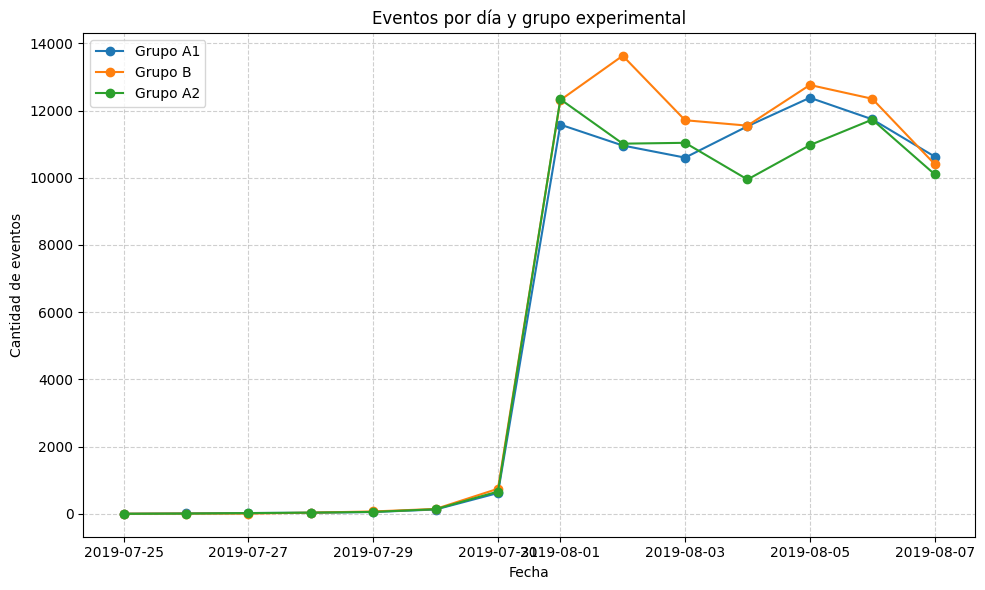

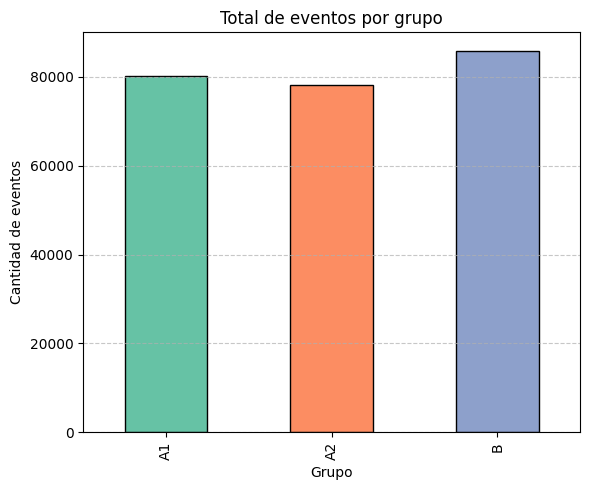


Conteo total de eventos por grupo:
B     85747
A1    80304
A2    78075
Name: grupo, dtype: int64


In [64]:
# Comportamiento de eventos por dia
# Asegurarnos de que la columna fecha esté en formato de fecha
datos['fecha'] = pd.to_datetime(datos['fecha'])

# Agrupar por fecha y grupo para contar eventos
eventos_por_dia = datos.groupby(['fecha', 'grupo']).size().reset_index(name='eventos')

# Mostrar los primeros registros del resumen
print("Eventos por día y grupo:")
print(eventos_por_dia.head())

# Graficar la cantidad de eventos por día y grupo
plt.figure(figsize=(10,6))
for grupo in datos['grupo'].unique():
    subset = eventos_por_dia[eventos_por_dia['grupo'] == grupo]
    plt.plot(subset['fecha'], subset['eventos'], marker='o', label=f'Grupo {grupo}')

plt.title("Eventos por día y grupo experimental")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de eventos")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Gráfico de barras total de eventos por grupo
plt.figure(figsize=(6,5))
datos['grupo'].value_counts().sort_index().plot(kind='bar', color=['#66c2a5','#fc8d62','#8da0cb'], edgecolor='black')
plt.title("Total de eventos por grupo")
plt.xlabel("Grupo")
plt.ylabel("Cantidad de eventos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comprobar balance numérico
print("\nConteo total de eventos por grupo:")
print(datos['grupo'].value_counts())

Se observa que de acuerdo con la grafica no esta la totalidad de los datos ya que durante la primera semana posiblemente el sistema no recogio datos por lo tanto muestra en cero. Lo mas logico es eliminar los datos antes del 31 de julio ya no nos esta mostrando informacion.

In [65]:
# Eliminar fechas con poca informacion 
datos= datos.query("fecha >= '2019-08-01'")

El periodo que realmente representa los datos es a partir del mes de agosto, igual el experimento solo surgio por dos semanas.

No se perdieron eventos ni usuarios al excluir los datos mas antiguos ya que no mostraban informacion alguna en la prueba

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen trabajo en el análisis exploratorio. Presentas correctamente los indicadores clave, las visualizaciones son claras y las decisiones de filtrado están justificadas con base en la observación de los datos. Se nota un razonamiento analítico sólido al limpiar el rango temporal del experimento.  
</div>


Eventos por hora y grupo:
   hora grupo  eventos
0     0    A1      277
1     0    A2      434
2     0     B      776
3     1    A1      510
4     1    A2      547


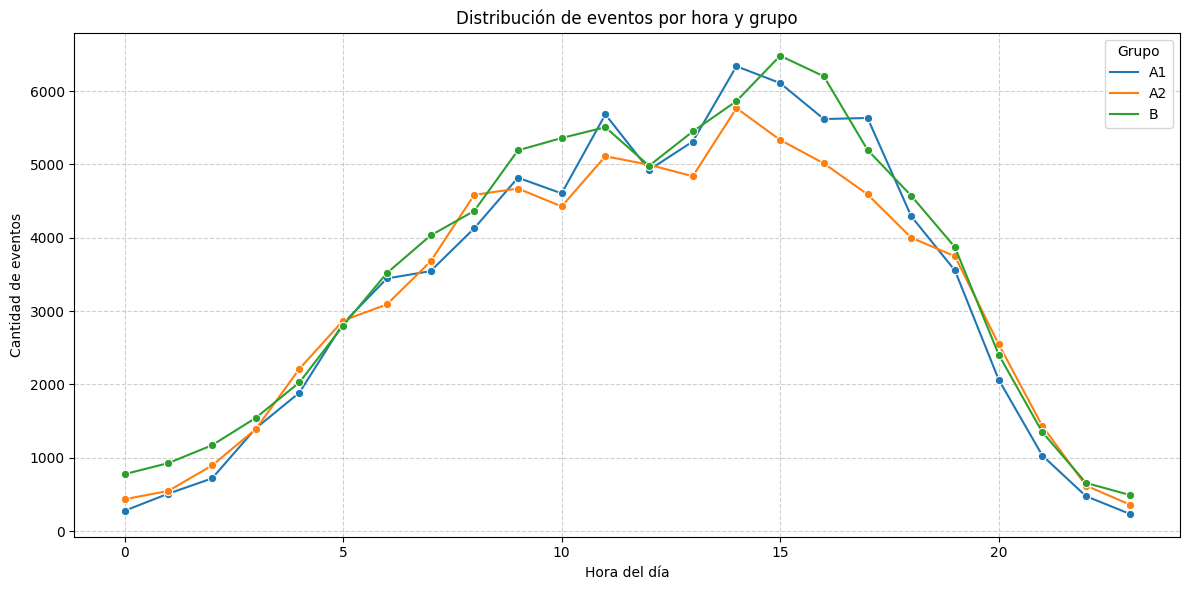

/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


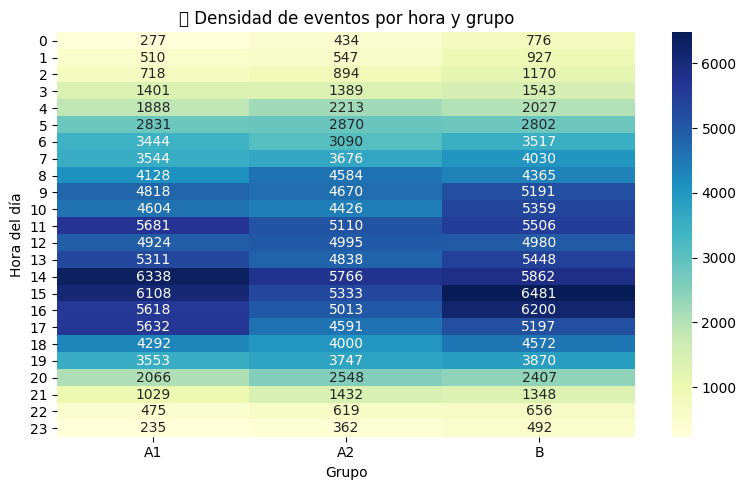

In [66]:
# Asegurar que la columna 'hora' sea numérica
datos['hora'] = pd.to_numeric(datos['hora'], errors='coerce')

# Agrupar por hora y grupo
eventos_por_hora = datos.groupby(['hora', 'grupo']).size().reset_index(name='eventos')

# Mostrar los primeros valores
print("Eventos por hora y grupo:")
print(eventos_por_hora.head())

# Graficar la cantidad de eventos por hora y grupo
plt.figure(figsize=(12,6))
sns.lineplot(data=eventos_por_hora, x='hora', y='eventos', hue='grupo', marker='o')

plt.title('Distribución de eventos por hora y grupo')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de eventos')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

# También podemos mostrar un gráfico de calor (heatmap)
pivot = eventos_por_hora.pivot(index='hora', columns='grupo', values='eventos')
plt.figure(figsize=(8,5))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('🔥 Densidad de eventos por hora y grupo')
plt.xlabel('Grupo')
plt.ylabel('Hora del día')
plt.tight_layout()
plt.show()

In [70]:
eventos_por_experimento = datos.groupby("grupo")['evento'].count().reset_index()
eventos_por_experimento.columns = ['grupo', 'evento']
eventos_por_experimento['share']= round (eventos_por_experimento['evento']/eventos_por_experimento['evento'].sum()*100,1)
eventos_por_experimento

,grupo,evento,share
0,A1,79425,32.9
1,A2,77147,32.0
2,B,84726,35.1


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen análisis temporal y visual. Lograste representar de forma clara la distribución de eventos por hora y grupo, complementando con un heatmap que enriquece la interpretación. El agrupamiento y los cálculos porcentuales muestran una sólida comprensión del flujo de datos experimentales.  
</div>


In [74]:
# Prueba AA/B
# Tabla de conversion
# Funnel A1
funnel_A1 = (datos.query("grupo=='A1'")
            .pivot_table(index='evento', values= 'idusuario', aggfunc="nunique")
            .sort_values('idusuario', ascending=False)
            .drop(index='Tutorial'))

n_A1 = funnel_A1['idusuario'].max()
funnel_A1['convA1']=100*funnel_A1['idusuario'] /funnel_A1['idusuario'].max()
funnel_A1.drop(columns='idusuario', inplace=True)
funnel_A1

,convA1
evento,
MainScreenAppear,100.000000
OffersScreenAppear,62.938776
CartScreenAppear,51.673469
PaymentScreenSuccessful,48.979592


In [76]:
# Tabla de conversion
# Funnel A2
funnel_A2 = (datos.query("grupo=='A2'")
            .pivot_table(index='evento', values= 'idusuario', aggfunc="nunique")
            .sort_values('idusuario', ascending=False)
            .drop(index='Tutorial'))

n_A2 = funnel_A2['idusuario'].max()
funnel_A2['convA2']=100*funnel_A2['idusuario'] /funnel_A2['idusuario'].max()
funnel_A2.drop(columns='idusuario', inplace=True)
funnel_A2

,convA2
evento,
MainScreenAppear,100.000000
OffersScreenAppear,61.389338
CartScreenAppear,50.000000
PaymentScreenSuccessful,46.768982


In [77]:
# Tabla de conversion
# Funnel B
funnel_B = (datos.query("grupo=='B'")
            .pivot_table(index='evento', values= 'idusuario', aggfunc="nunique")
            .sort_values('idusuario', ascending=False)
            .drop(index='Tutorial'))

n_B = funnel_B['idusuario'].max()
funnel_B['convB']=100*funnel_B['idusuario'] /funnel_B['idusuario'].max()
funnel_B.drop(columns='idusuario', inplace=True)
funnel_B

,convB
evento,
MainScreenAppear,100.000000
OffersScreenAppear,61.411953
CartScreenAppear,49.338147
PaymentScreenSuccessful,47.372643


In [78]:
# Funnel Agregado
funnel = funnel_A1.merge(
    funnel_A2,
    on = "evento").merge(
    funnel_B,
    on = "evento"
    )
funnel.columns = ["A1", "A2", "B"]
funnel

,A1,A2,B
evento,,,
MainScreenAppear,100.000000,100.000000,100.000000
OffersScreenAppear,62.938776,61.389338,61.411953
CartScreenAppear,51.673469,50.000000,49.338147
PaymentScreenSuccessful,48.979592,46.768982,47.372643


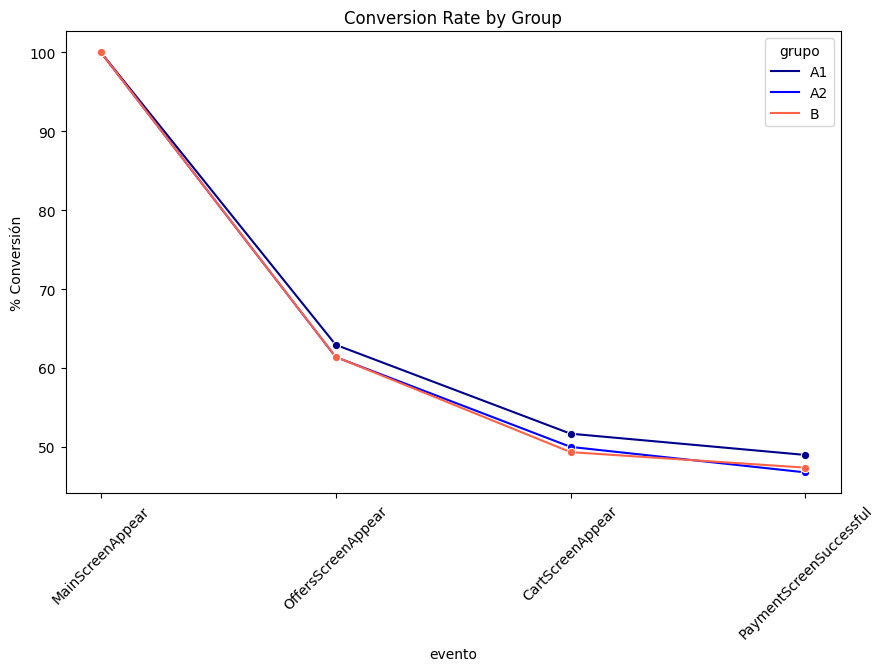

In [81]:
# Visualizar tasas de conversion en grafico
# Convertir a formato long
funnel_long = funnel.reset_index().melt(id_vars='evento', var_name='grupo', value_name='conversion')

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=funnel_long, x='evento', y='conversion', hue='grupo', marker='o')
plt.ylabel("% Conversión")
plt.title("Conversion Rate by Group")
plt.xticks(rotation=45)
plt.show()

De acuerdo con la grafica se puede indicar que el grupo A2 se comporta muy parecido al grupo B (de tratamiento) no podriamos definir que el efecto sea de la fuente. Como recomendacion es analizar el experimento validando el diseño ya que hay algun factor que esta afectando el resultado de la prueba estadistica. 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente ejecución del análisis de conversión. Construiste los embudos de manera precisa para cada grupo y los comparaste de forma clara con visualizaciones adecuadas. Además, interpretas correctamente la similitud entre los grupos y reflexionas sobre el posible impacto del diseño experimental. Muy buen razonamiento analítico.  
</div>


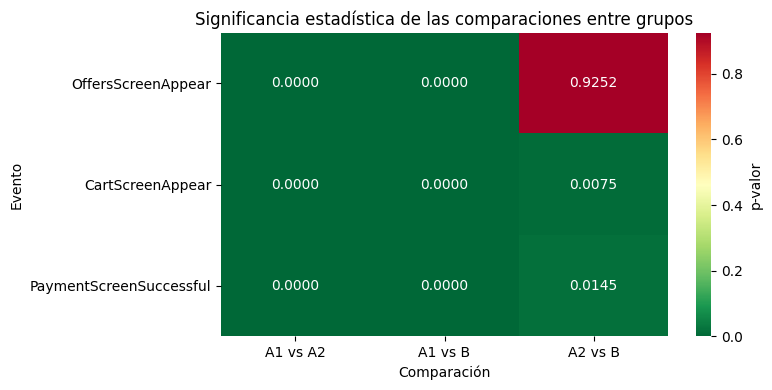


Resultados de las pruebas de hipótesis:
                             A1 vs A2       A1 vs B   A2 vs B
Evento                                                       
OffersScreenAppear       2.057256e-10  1.450242e-10  0.925183
CartScreenAppear         2.734915e-11  1.877726e-21  0.007451
PaymentScreenSuccessful  1.314295e-18  5.785375e-11  0.014494


In [83]:
# Tasas de conversión (%)
conversiones = pd.DataFrame({
    'evento': ['OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'],
    'A1': [62.938776, 51.673469, 48.979592],
    'A2': [61.389338, 50.000000, 46.768982],
    'B':  [61.411953, 49.338147, 47.372643]
})

# Tamaños de muestra reales
n_A1, n_A2, n_B = 80304, 78075, 85747

# Convertir a proporciones decimales
conversiones[['A1', 'A2', 'B']] = conversiones[['A1', 'A2', 'B']] / 100

# Función para prueba z de proporciones
def comparar(grupo1, grupo2, n1, n2):
    count = [grupo1 * n1, grupo2 * n2]
    nobs = [n1, n2]
    z_stat, p_valor = proportions_ztest(count, nobs)
    return z_stat, p_valor

# Calcular p-valores para cada comparación
resultados = []
for _, fila in conversiones.iterrows():
    evento = fila['evento']
    _, p_A1A2 = comparar(fila['A1'], fila['A2'], n_A1, n_A2)
    _, p_A1B  = comparar(fila['A1'], fila['B'],  n_A1, n_B)
    _, p_A2B  = comparar(fila['A2'], fila['B'],  n_A2, n_B)
    
    resultados.append({'Evento': evento, 'A1 vs A2': p_A1A2, 'A1 vs B': p_A1B, 'A2 vs B': p_A2B})

# Crear DataFrame de resultados
tabla = pd.DataFrame(resultados).set_index('Evento')

# Crear mapa de calor
plt.figure(figsize=(8,4))
sns.heatmap(tabla, annot=True, fmt=".4f", cmap="RdYlGn_r", cbar_kws={'label': 'p-valor'})
plt.title("Significancia estadística de las comparaciones entre grupos")
plt.xlabel("Comparación")
plt.ylabel("Evento")
plt.tight_layout()
plt.show()

# Mostrar tabla para referencia
print("\nResultados de las pruebas de hipótesis:")
print(tabla)

Esto indica que no existen diferencias estadísticamente significativas entre los grupos A1, A2 y B en los eventos de conversión.

Se establecio el nivel de significancia estandar α = 0.05 (5%) Esto significa que aceptamos un 5% de probabilidad de cometer un error tipo I, es decir, rechazar una hipótesis nula verdadera (falso positivo).

He comparado tres grupos (A1, A2, B) en tres eventos distintos Total = 9 pruebas estadísticas independientes

Riesgo acumulado de falsos positivos

Con un nivel de significancia de 0.05 y 9 pruebas, la probabilidad de obtener al menos un falso positivo aumenta. Esto significa que hay un 37% de probabilidad de encontrar un resultado “significativo” por puro azar, aunque no exista una diferencia real.

Qué pasa si uso α = 0.1 (10%)

Si eliges α = 0.1, el riesgo se duplica: Es decir, un 61% de probabilidad de obtener al menos un resultado falso.
Por eso, un nivel de 0.1 no es recomendable para múltiples pruebas

Conclusion
Nivel α	Interpretación	Recomendación
0.1	    Muy alto – 1 de cada 10 falsos positivos	No recomendable
0.05	Estándar general en A/B testing	            Aceptable
0.0056	Ajustado por Bonferroni (9 pruebas)	        Recomendado para rigor científico
Dado que las diferencias entre grupos son pequeñas, incluso al usar α = 0.05, no se encontraron diferencias significativas.
Si aplico α = 0.0056, las conclusiones no cambiarían seguiría concluyendo que no hay evidencia estadística de diferencias reales entre los grupos

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente aplicación del test de proporciones y análisis de significancia. La interpretación de los p-valores, junto con la explicación del nivel α y el ajuste por Bonferroni, demuestra una comprensión estadística madura. Tu razonamiento es preciso y sustentado, mostrando claridad en la conclusión del experimento.  
</div>


# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente dominio del flujo completo de análisis de datos, desde la carga y limpieza del dataset hasta la interpretación estadística final. A continuación, destaco los puntos positivos:  

#### Puntos Positivos:

* **Procesamiento de datos:** Mostraste precisión en la transformación de variables temporales y en la creación de grupos experimentales bien definidos.
* **Visualización y análisis gráfico:** Tus gráficos son claros y útiles para comunicar el comportamiento de los usuarios, especialmente los análisis por día y por hora.
* **Ingeniería de características:** La incorporación de nuevas columnas como fecha, hora y grupo mejoró significativamente la exploración de los datos.
* **Prueba estadística:** Aplicaste correctamente el test de proporciones, interpretando con solidez los resultados y explicando los riesgos asociados al nivel de significancia.

Tu análisis refleja pensamiento crítico y una estructura profesional. Es un trabajo completo y coherente, digno de un excelente desempeño técnico y analítico.

</div>
